<a href="https://colab.research.google.com/github/SnehaRS10/DMBI_LAB/blob/main/DMBI_6ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Iris.csv')

In [ ]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans clustering with desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
cluster_labels = kmeans.predict(X_test)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_test, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5583237386295815


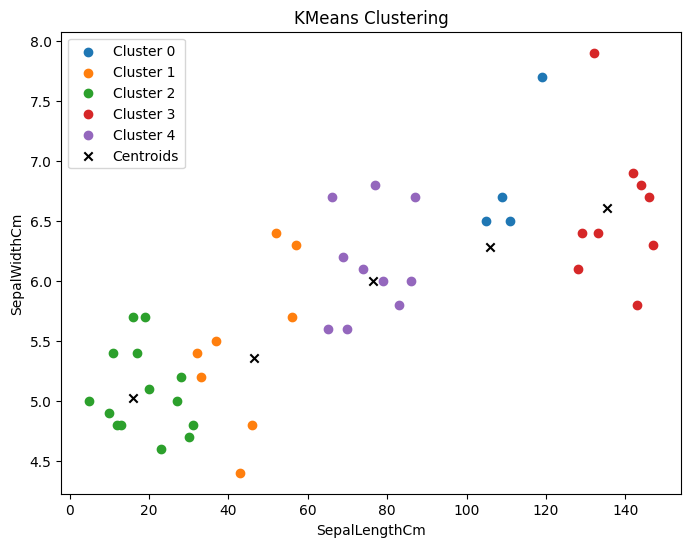

In [ ]:
plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels
for cluster_label in set(cluster_labels):
    # Select data points corresponding to the current cluster
    cluster_data = X_test[cluster_labels == cluster_label]

    # Plot the data points for the current cluster
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_label}')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [ ]:
cluster_labels = dbscan.labels_

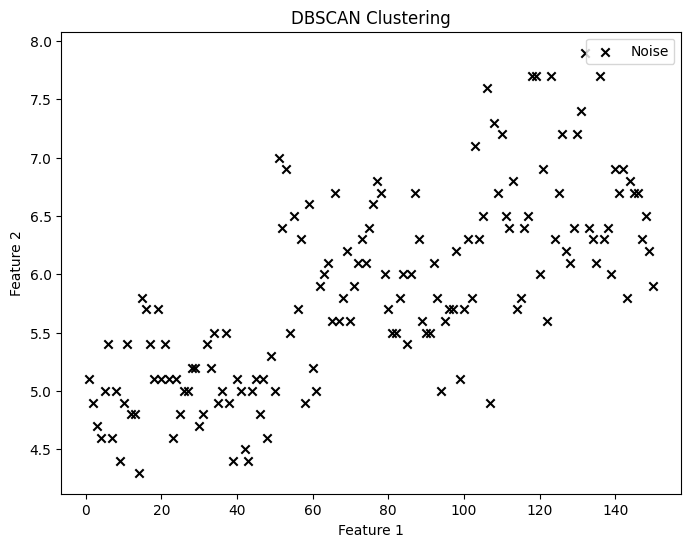

In [ ]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Extracting unique cluster labels (excluding noise points)
unique_labels = set(dbscan.labels_)
unique_labels.discard(-1)  # Discard noise points

# Assigning colors for each cluster label
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster
for label, color in zip(unique_labels, colors):
    # Find data points belonging to the current cluster
    cluster_data = data[dbscan.labels_ == label]

    # Plot the data points for the current cluster
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=color, label=f'Cluster {label}')

# Plotting noise points (if any)
noise_data = data[dbscan.labels_ == -1]
if not noise_data.empty:
    plt.scatter(noise_data.iloc[:, 0], noise_data.iloc[:, 1], color='black', marker='x', label='Noise')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


In [ ]:
print(set(dbscan.labels_))

{-1}


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(X)

AgglomerativeClustering(n_clusters=3)

In [ ]:
cluster_labels = hierarchical.labels_

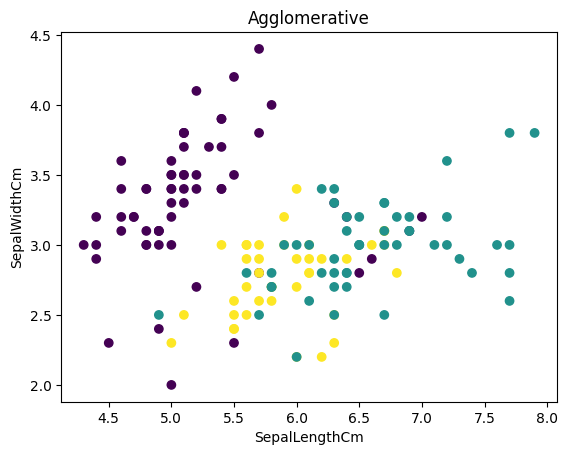

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'], c=cluster_labels)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Agglomerative')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z1 = linkage(X, method='single', metric='euclidean')
Z2 = linkage(X, method='complete', metric='euclidean')
Z4 = linkage(X, method='ward', metric='euclidean')
Z3 = linkage(X, method='average', metric='euclidean')

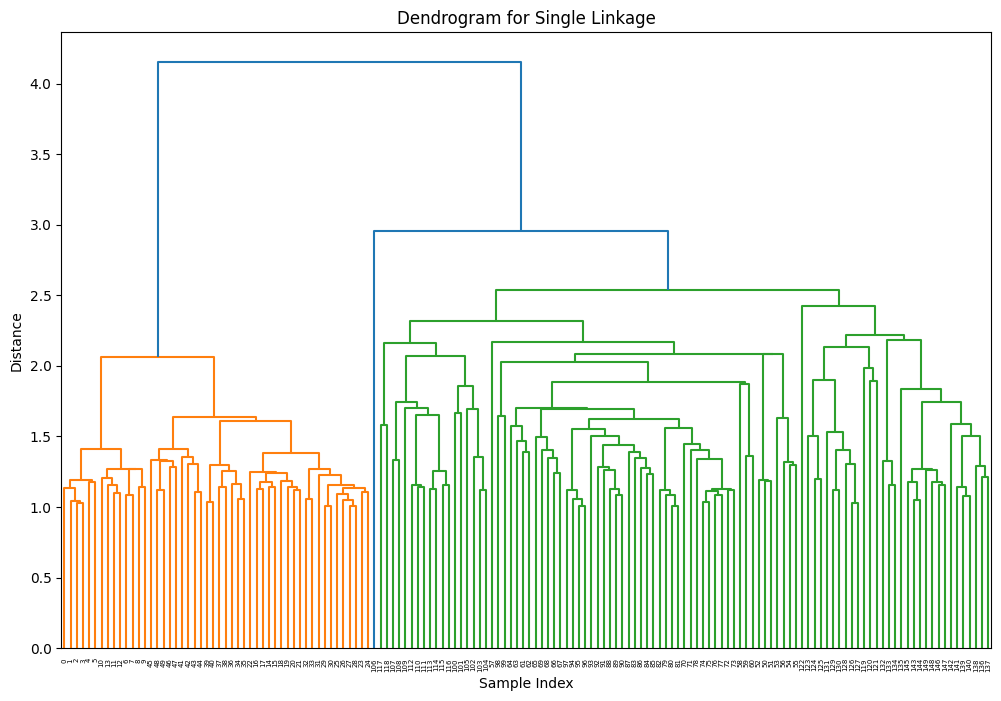

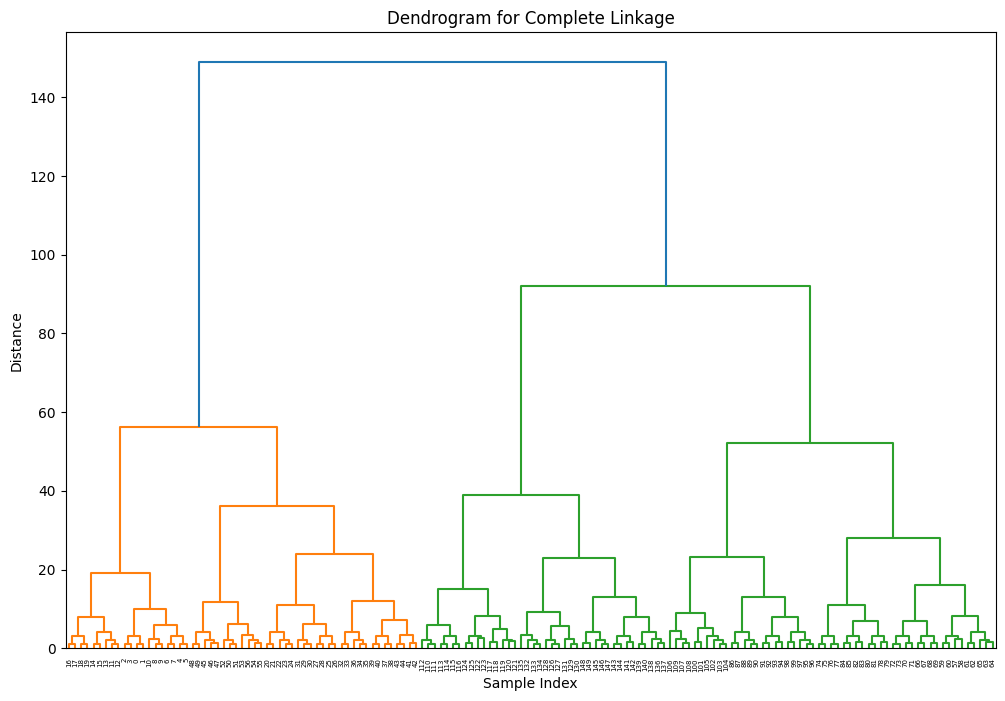

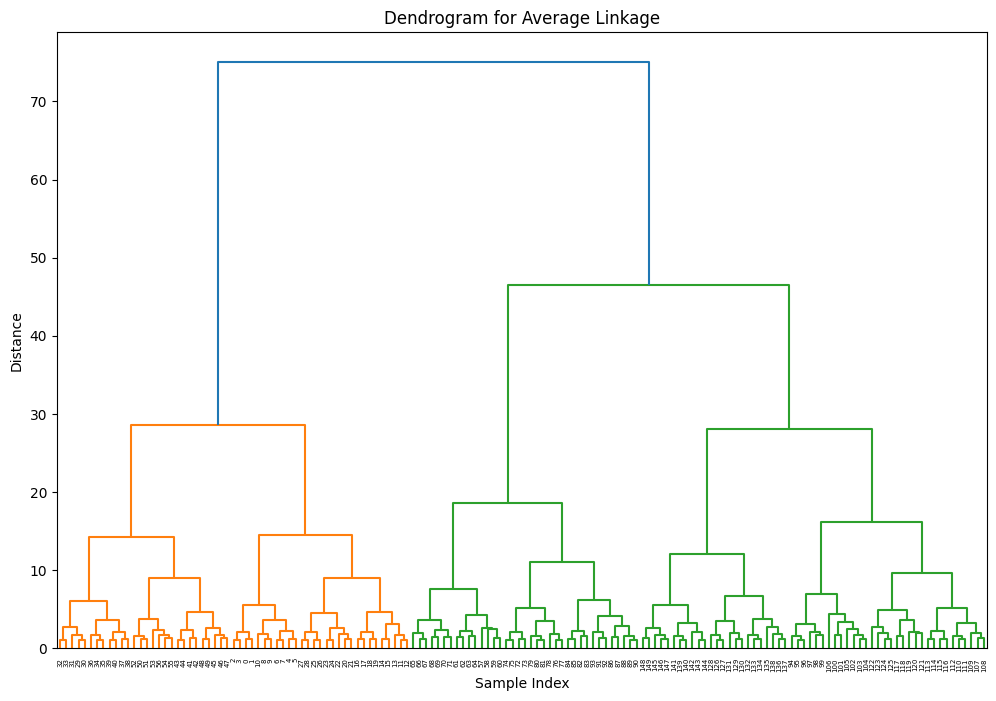

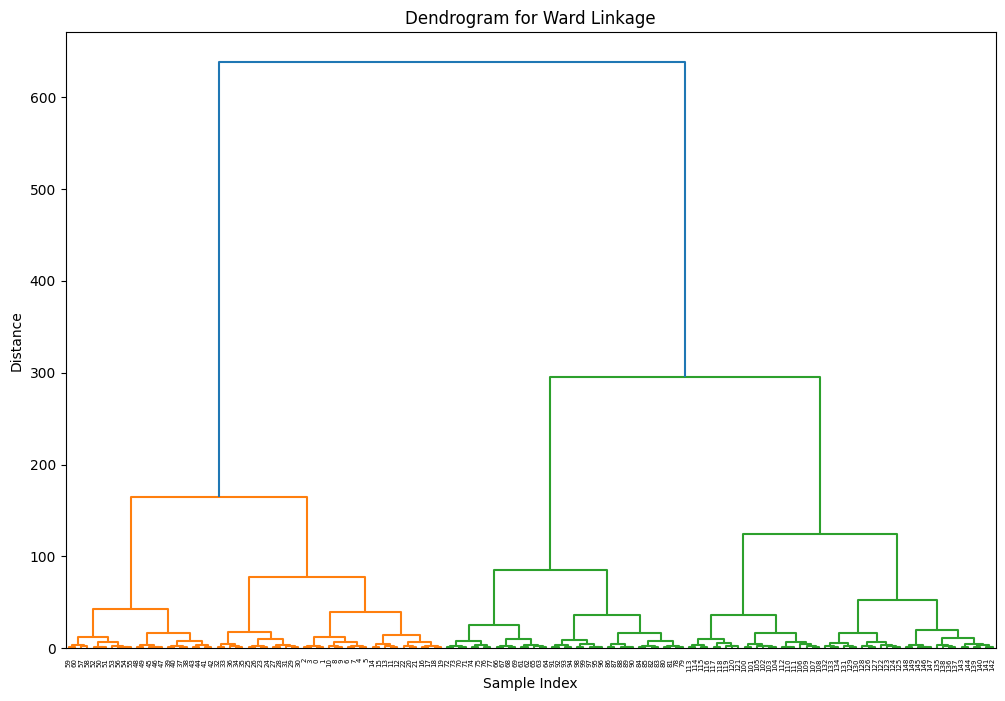

In [ ]:
# Plot dendrogram for Z1 (single linkage)
plt.figure(figsize=(12, 8))
dendrogram(Z1)
plt.title('Dendrogram for Single Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for Z2 (complete linkage)
plt.figure(figsize=(12, 8))
dendrogram(Z2)
plt.title('Dendrogram for Complete Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for Z3 (average linkage)
plt.figure(figsize=(12, 8))
dendrogram(Z3)
plt.title('Dendrogram for Average Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Plot dendrogram for Z4 (ward linkage)
plt.figure(figsize=(12, 8))
dendrogram(Z4)
plt.title('Dendrogram for Ward Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
